In [1]:
import sys
print(sys.executable)

/home/nalines/anaconda3/envs/pgm/bin/python


In [3]:
%pylab inline
import arviz as az
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import graphviz
import os
import pymc3 as pm
from pymc3 import Model, Normal, HalfNormal, Bernoulli
from pymc3 import find_MAP

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [6]:
os.environ['OMP_NUM_THREADS'] = '4'

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.linspace(0, 1, size)
X2 = np.linspace(0,.2, size)

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

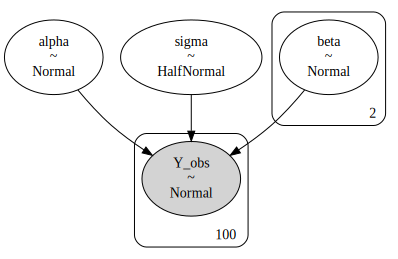

In [7]:
basic_model = Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=5)
    beta = Normal('beta', mu=0, sd=5, shape=2)
    sigma = HalfNormal('sigma', sd=4)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2 
    
    # Deterministic variable, to have PyMC3 store mu as a value in the trace use
    # mu = pm.Deterministic('mu', alpha + beta[0]*X1 + beta[1]*X2)
    
    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

pm.model_to_graphviz(basic_model)

In [9]:
map_estimate = find_MAP(model=basic_model, maxeval=10000)
map_estimate

{'alpha': array(1.0154193),
 'beta': array([1.46379432, 0.29275886]),
 'sigma_log__': array(0.12023688),
 'sigma': array(1.12776396)}